In [248]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.dates as md
import math
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
# def parser(s):
#     return pd.to_datetime(s)

In [251]:
#df = pd.read_csv("drive/MyDrive/ambient_temperature_system_failure.csv",parse_dates=[0], index_col=0,date_parser=parser)

In [252]:
df = pd.read_csv("drive/MyDrive/ambient_temperature_system_failure.csv")

In [253]:
print(df)

                timestamp      value
0     2013-07-04 00:00:00  69.880835
1     2013-07-04 01:00:00  71.220227
2     2013-07-04 02:00:00  70.877805
3     2013-07-04 03:00:00  68.959400
4     2013-07-04 04:00:00  69.283551
...                   ...        ...
7262  2014-05-28 11:00:00  72.370206
7263  2014-05-28 12:00:00  72.172956
7264  2014-05-28 13:00:00  72.046565
7265  2014-05-28 14:00:00  71.825226
7266  2014-05-28 15:00:00  72.584089

[7267 rows x 2 columns]


In [254]:

df['value'] = (df['value'] - 32) * 5/9


In [255]:
print(df)

                timestamp      value
0     2013-07-04 00:00:00  21.044908
1     2013-07-04 01:00:00  21.789015
2     2013-07-04 02:00:00  21.598781
3     2013-07-04 03:00:00  20.533000
4     2013-07-04 04:00:00  20.713084
...                   ...        ...
7262  2014-05-28 11:00:00  22.427892
7263  2014-05-28 12:00:00  22.318309
7264  2014-05-28 13:00:00  22.248092
7265  2014-05-28 14:00:00  22.125126
7266  2014-05-28 15:00:00  22.546716

[7267 rows x 2 columns]


<Axes: >

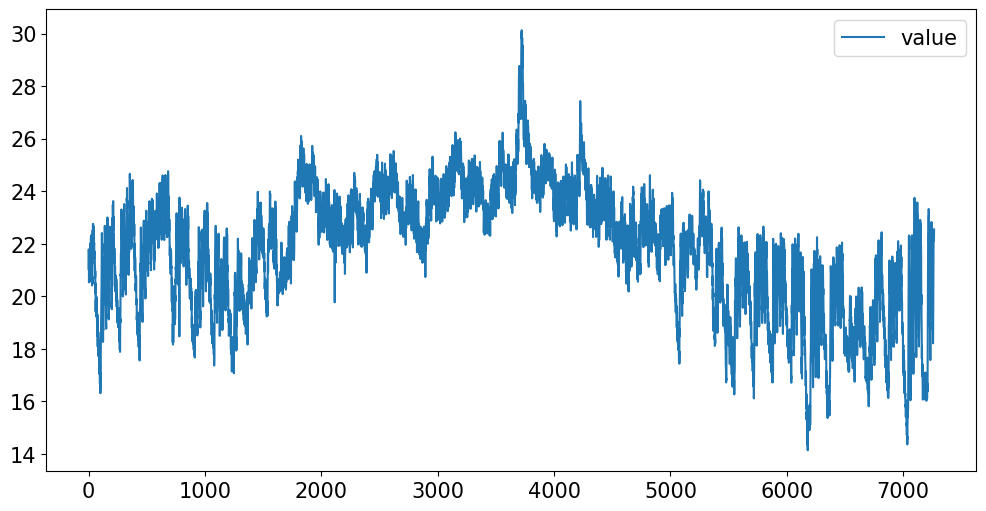

In [256]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
df.plot()

In [257]:
outliers_fraction = float(.01)

In [258]:
size=df.shape[0]

In [259]:
#df=df.tail(180)

In [260]:
#print(df)

In [261]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df[['value']])
data = pd.DataFrame(np_scaled)

In [262]:
#Important parameters and training/Test size
prediction_time = 1 
testdatasize = 1000
unroll_length = 50
testdatacut = testdatasize + unroll_length  + 1

#Training data
train_data = data[0:-prediction_time-testdatacut].values

#Test data
test_data = data[0-testdatacut:-prediction_time].values

In [263]:
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.01)

<ipython-input-264-6f30330188cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testt['anomaly']=model.predict(test_data)


   key_0            timestamp      value
0   7029  2014-05-18 18:00:00  15.175923
1   7030  2014-05-18 19:00:00  15.077814
2   7031  2014-05-18 20:00:00  15.186548
3   7032  2014-05-18 21:00:00  14.724430
4   7033  2014-05-18 22:00:00  15.059782
5   7034  2014-05-18 23:00:00  14.533523
6   7035  2014-05-19 00:00:00  14.679799
7   7036  2014-05-19 01:00:00  14.367725
8   7037  2014-05-19 02:00:00  14.799608
9   7038  2014-05-19 03:00:00  15.041495


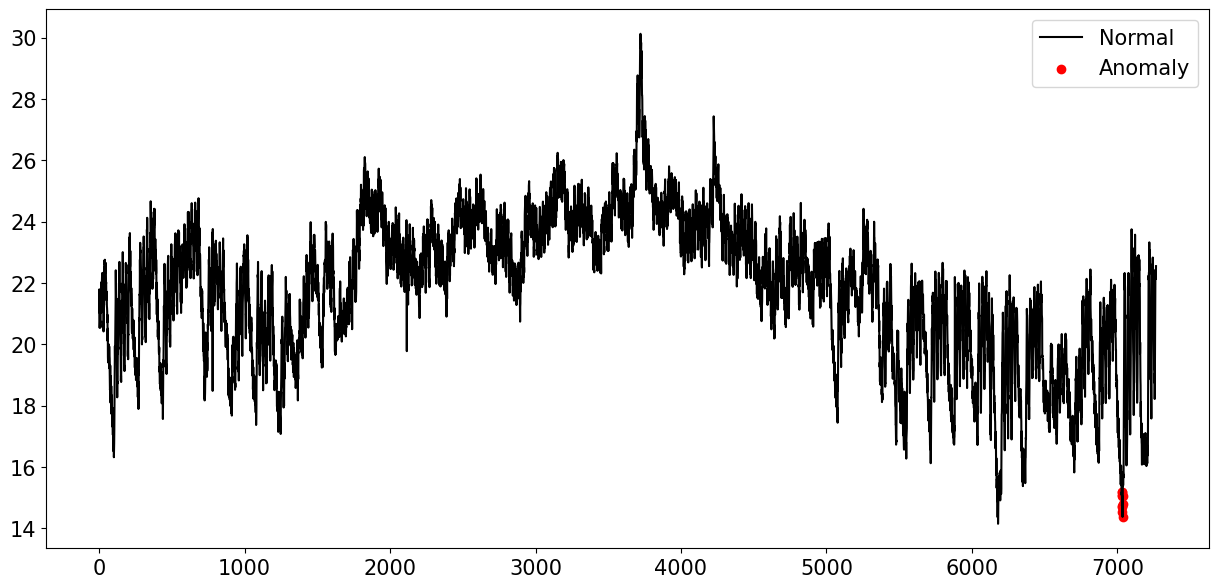

In [264]:
testt=df[0-testdatacut:-prediction_time]
testt['anomaly']=model.predict(test_data)
fig, ax = plt.subplots(figsize=(15,7))

a = testt.loc[testt['anomaly'] == -1, ['value']] #anomaly
b = testt.loc[testt['anomaly']==-1,['timestamp']]
anomaly=pd.merge(b,a,on=b.index)

print(anomaly)

ax.plot(df.index, df['value'], color='black', label = 'Normal')
ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [265]:
pip install paho-mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [266]:

import requests
from dateutil import parser, tz
import pytz
import paho.mqtt.client as mqtt #import the client1

# Set up the Adafruit IO REST API URL and key
AIO_URL_DATA = 'https://io.adafruit.com/api/v2/thonghuynhthanh/feeds/testdadn/data'
AIO_URL = 'https://io.adafruit.com/api/v2/thonghuynhthanh/feeds/testdadn'
AIO_KEY = 'aio_fuaC55KGa7zgLYReO4Cqn3XzJzRa'
LUX_TOPIC   = "thonghuynhthanh/feeds/anhsang/json"
TEMP_TOPIC   = "thonghuynhthanh/feeds/nhietdo/json"
HUM_A_TOPIC   = "thonghuynhthanh/feeds/doamkhongkhi/json"
HUM_B_TOPIC   = "thonghuynhthanh/feeds/doamdat/json"
MQTT_PASSWORD   = "aio_fuaC55KGa7zgLYReO4Cqn3XzJzRa"
MQTT_USERNAME   = "thonghuynhthanh"
CANHBAO_TOPIC = "thonghuynhthanh/feeds/canhbao/json"
BATTHUONG_TOPIC = "thonghuynhthanh/feeds/batthuong/json"
TOPIC="thonghuynhthanh/feeds/testdadn/json"
client = mqtt.Client("P1") #create new instance
client.username_pw_set(MQTT_USERNAME, MQTT_PASSWORD)
client.connect("io.adafruit.com") #connect to broker

# Set up the HTTP headers
headers = {'X-AIO-Key': AIO_KEY}
params = {'limit': 30}  
# Make the API request to retrieve all the data from the feed



def getLightRecord():
    response = requests.get(AIO_URL_DATA, headers=headers, params=params)
    # Parse the response JSON and print the data values
    data = response.json()
    lis=list([])
    for dat in data:
      values = dat['value'][1:-1].split(';')
      values = [float(val.split(":")[1]) for val in values]
      if len(values)!=4:
        return lis
      created_at_str = dat['created_at']

    # Convert the timestamp string to a DateTime object
      tz_vietnam = pytz.timezone('Asia/Ho_Chi_Minh')

      created_at_dt = parser.parse(created_at_str).astimezone(tz_vietnam)
      lis.append([created_at_dt.strftime('%Y-%m-%d %H:%M:%S'), values[3]])

    # Print the DateTime object
    # YYYY-MM-DD hh:mm:ss
    return lis
def getTempRecord():
    response = requests.get(AIO_URL_DATA, headers=headers, params=params)
    # Parse the response JSON and print the data values
    data = response.json()
    lis=list([])
    for dat in data:
      values = dat['value'][1:-1].split(';')
      values = [float(val.split(":")[1]) for val in values]
      if len(values)!=4:
        return lis
      created_at_str = dat['created_at']

    # Convert the timestamp string to a DateTime object
      tz_vietnam = pytz.timezone('Asia/Ho_Chi_Minh')

      created_at_dt = parser.parse(created_at_str).astimezone(tz_vietnam)
      lis.append([created_at_dt.strftime('%Y-%m-%d %H:%M:%S'), values[0]])

    # Print the DateTime object
    # YYYY-MM-DD hh:mm:ss
    return lis
def getHumidityRecord():
    response = requests.get(AIO_URL_DATA, headers=headers, params=params)
    # Parse the response JSON and print the data values
    data = response.json()
    lis=list([])
    for dat in data:
      values = dat['value'][1:-1].split(';')
      values = [float(val.split(":")[1]) for val in values]
      if len(values)!=4:
        return lis
      created_at_str = dat['created_at']

    # Convert the timestamp string to a DateTime object
      tz_vietnam = pytz.timezone('Asia/Ho_Chi_Minh')

      created_at_dt = parser.parse(created_at_str).astimezone(tz_vietnam)
      lis.append([created_at_dt.strftime('%Y-%m-%d %H:%M:%S'), values[2]])

    # Print the DateTime object
    # YYYY-MM-DD hh:mm:ss
    return lis
def getSoilRecord():
    response = requests.get(AIO_URL_DATA, headers=headers, params=params)
    # Parse the response JSON and print the data values
    data = response.json()
    lis=list([])
    for dat in data:
      values = dat['value'][1:-1].split(';')
      values = [float(val.split(":")[1]) for val in values]
      if len(values)!=4:
        return lis
      created_at_str = dat['created_at']

    # Convert the timestamp string to a DateTime object
      tz_vietnam = pytz.timezone('Asia/Ho_Chi_Minh')

      created_at_dt = parser.parse(created_at_str).astimezone(tz_vietnam)
      lis.append([created_at_dt.strftime('%Y-%m-%d %H:%M:%S'), values[1]])

    # Print the DateTime object
    # YYYY-MM-DD hh:mm:ss
    return lis
def pushVal(client, topic, data):
    # client.on_message = on_message
    client.publish(topic, data)
    client.subscribe(topic)


Empty DataFrame
Columns: [key_0, timestamp, value]
Index: []


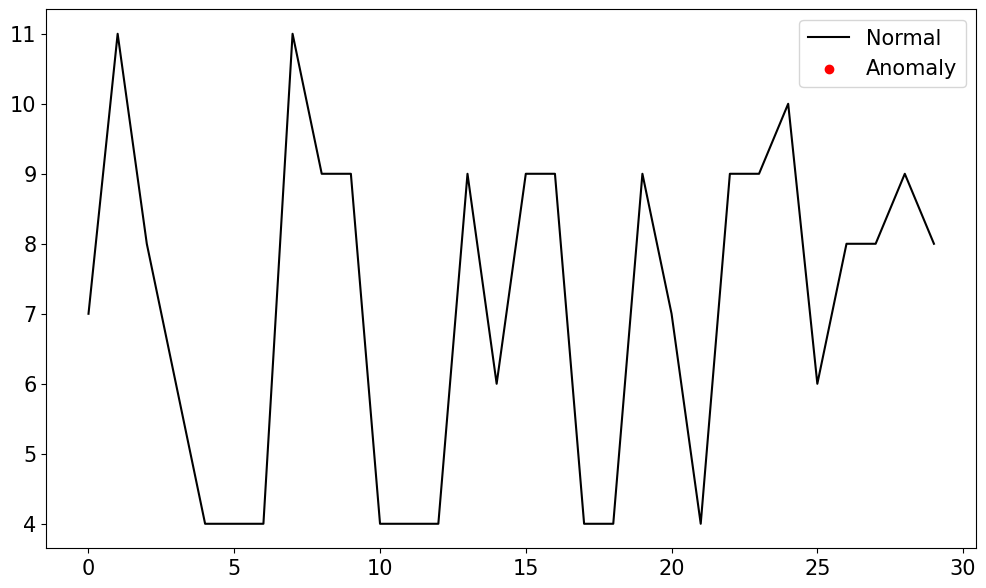

In [267]:
light=pd.DataFrame(getLightRecord(),columns=['timestamp','value'])
scaler = StandardScaler()
np_scaled = scaler.fit_transform(light[['value']])
data_test = pd.DataFrame(np_scaled)
light['anomaly']=model.predict(data_test)
fig, ax = plt.subplots(figsize=(12,7))

a1 = light.loc[light['anomaly'] == -1, ['value']] #anomaly
b1 = light.loc[light['anomaly']==-1,['timestamp']]
anomaly1=pd.merge(b1,a1,on=b1.index)

print(anomaly1)

ax.plot(light.index, light['value'], color='black', label = 'Normal')
ax.scatter(a1.index,a1['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

Empty DataFrame
Columns: [key_0, timestamp, value]
Index: []


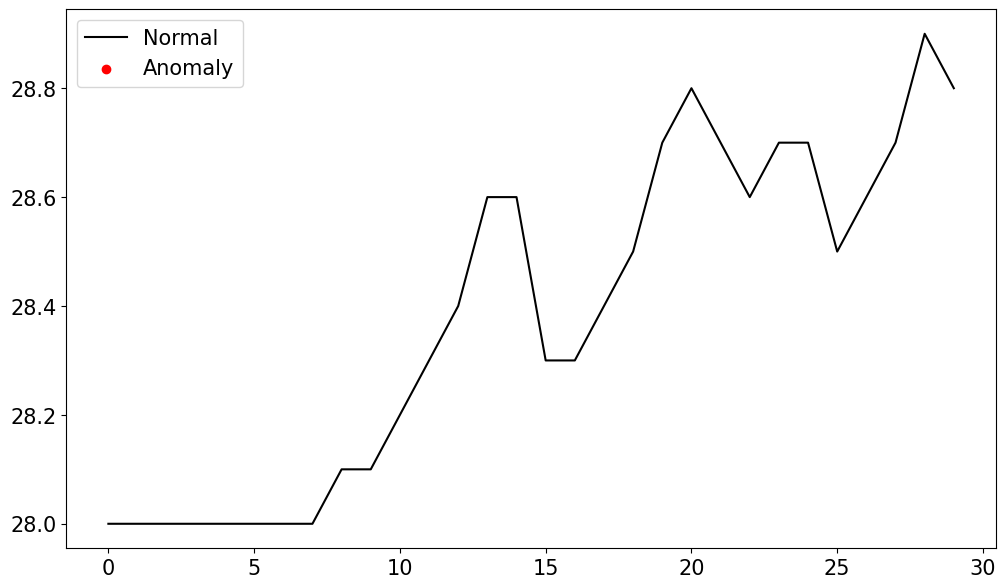

In [268]:
temp=pd.DataFrame(getTempRecord(),columns=['timestamp','value'])
scaler = StandardScaler()
np_scaled = scaler.fit_transform(temp[['value']])
data_test = pd.DataFrame(np_scaled)
temp['anomaly']=model.predict(data_test)
fig, ax = plt.subplots(figsize=(12,7))

a2 = temp.loc[temp['anomaly'] == -1, ['value']] #anomaly
b2 = temp.loc[temp['anomaly']==-1,['timestamp']]
anomaly2=pd.merge(b2,a2,on=b2.index)

print(anomaly2)

ax.plot(temp.index, temp['value'], color='black', label = 'Normal')
ax.scatter(a2.index,a2['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

   key_0            timestamp  value
0     28  2023-05-14 08:57:59   56.9


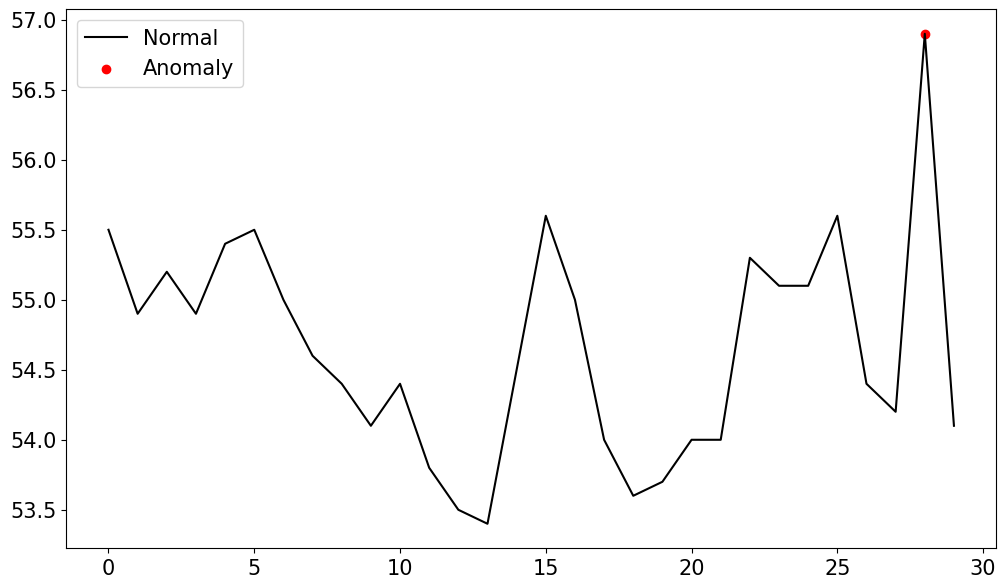

In [269]:
humidity=pd.DataFrame(getHumidityRecord(),columns=['timestamp','value'])
scaler = StandardScaler()
np_scaled = scaler.fit_transform(humidity[['value']])
data_test = pd.DataFrame(np_scaled)
humidity['anomaly']=model.predict(data_test)
fig, ax = plt.subplots(figsize=(12,7))

a3 = humidity.loc[humidity['anomaly'] == -1, ['value']] #anomaly
b3 = humidity.loc[humidity['anomaly']==-1,['timestamp']]
anomaly3=pd.merge(b3,a3,on=b3.index)

print(anomaly3)

ax.plot(humidity.index, humidity['value'], color='black', label = 'Normal')
ax.scatter(a3.index,a3['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

Empty DataFrame
Columns: [key_0, timestamp, value]
Index: []


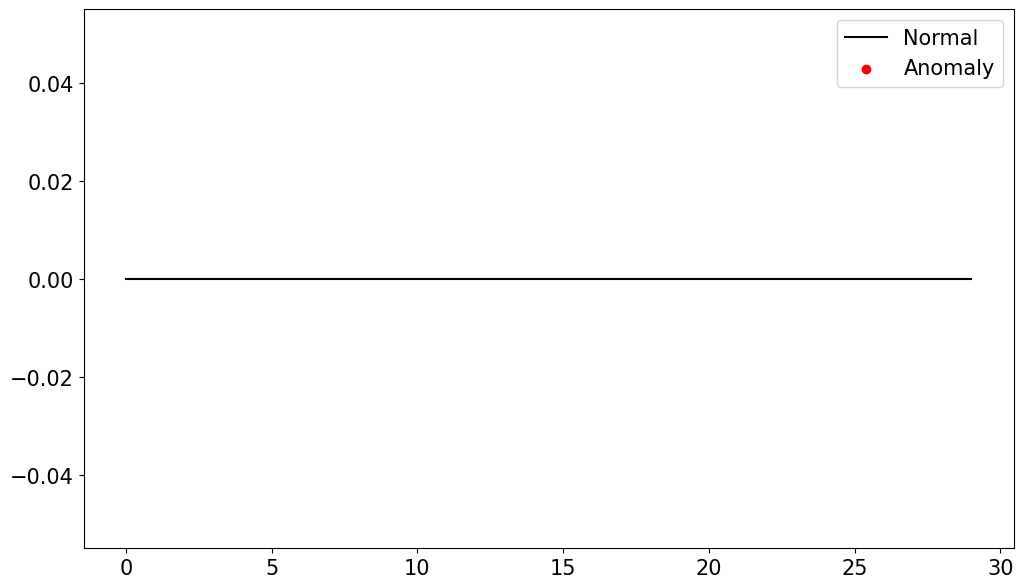

In [270]:
soil=pd.DataFrame(getSoilRecord(),columns=['timestamp','value'])
scaler = StandardScaler()
np_scaled = scaler.fit_transform(soil[['value']])
data_test = pd.DataFrame(np_scaled)
soil['anomaly']=model.predict(data_test)
fig, ax = plt.subplots(figsize=(12,7))

a4 = soil.loc[soil['anomaly'] == -1, ['value']] #anomaly
b4 = soil.loc[soil['anomaly']==-1,['timestamp']]
anomaly4=pd.merge(b4,a4,on=b4.index)

print(anomaly4)

ax.plot(soil.index, soil['value'], color='black', label = 'Normal')
ax.scatter(a4.index,a4['value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [271]:
# df['anomaly'] = model.predict(data)

# # visualization
# fig, ax = plt.subplots(figsize=(15,10))

# a = df.loc[df['anomaly'] == -1, ['value']] #anomaly
# anomaly=df.loc[df['anomaly']==-1,['timestamp']]
# ac=pd.merge(a,anomaly,on=a.index)
# ax.plot(df.index, df['value'], color='black', label = 'Normal')
# ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
# plt.legend()
# plt.show();

In [272]:
# df['anomaly'] = model.predict(data)

# # visualization
# fig, ax = plt.subplots(figsize=(10,6))

# a = df.loc[df['anomaly'] == -1, ['value']] #anomaly

# ax.plot(df.index, df['value'], color='black', label = 'Normal')
# ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
# plt.legend()
# plt.show();

In [273]:
# def Is_anomalylight(Dataframe,size):
#   for i in range(0,size-1):
#     if Dataframe['anomaly'][i]==-1:
#       mean=Dataframe['value'].mean()
#       if Dataframe['value'][i]<mean:
#         pushVal(client, CANHBAO_TOPIC, "!5:1#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(1,"+str(Dataframe['value'][i])+")#")
#       else:
#         pushVal(client, CANHBAO_TOPIC, "!5:0#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(1,"+str(Dataframe['value'][i])+")#")
# def Is_anomalytemp(Dataframe,size):
#   for i in range(0,size-1):
#     if Dataframe['anomaly'][i]==-1:
#       mean=Dataframe['value'].mean()
#       if Dataframe['value'][i]<mean:
#         pushVal(client, CANHBAO_TOPIC, "!7:1#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(2,"+str(Dataframe['value'][i])+")#")
#       else:
#         pushVal(client, CANHBAO_TOPIC, "!7:0#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(2,"+str(Dataframe['value'][i])+")#")
# def Is_anomalyhumidityA(Dataframe,size):
#   for i in range(0,size-1):
#     if Dataframe['anomaly'][i]==-1:
#       mean=Dataframe['value'].mean()
#       if Dataframe['value'][i]<mean:
#         pushVal(client, CANHBAO_TOPIC, "!6:1#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(3,"+str(Dataframe['value'][i])+")#")
#       else:
#         pushVal(client, CANHBAO_TOPIC, "!6:0#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(3,"+str(Dataframe['value'][i])+")#")
# def Is_anomalyhumidityB(Dataframe,size):
#   for i in range(0,size-1):
#     if Dataframe['anomaly'][i]==-1:
#       mean=Dataframe['value'].mean()
#       if Dataframe['value'][i]<mean:
#         pushVal(client, CANHBAO_TOPIC, "!6:1#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(4,"+str(Dataframe['value'][i])+")#")
#       else:
#         pushVal(client, CANHBAO_TOPIC, "!6:0#")
#         pushVal(client, BATTHUONG_TOPIC, "!"+Dataframe['timestamp'][i]+":"+"(4,"+str(Dataframe['value'][i])+")#")

In [274]:
anomaly1 = anomaly1.rename(columns={'value': 'value_light'})
anomaly2 = anomaly2.rename(columns={'value': 'value_temp'})
anomaly3 = anomaly3.rename(columns={'value': 'value_hum1'})
anomaly4 = anomaly4.rename(columns={'value': 'value_hum2'})
te1=pd.merge(pd.merge(pd.merge(anomaly1,anomaly2,on=['key_0','timestamp'],how='outer'),anomaly3,on=['key_0','timestamp'],how='outer'),anomaly4,on=['key_0','timestamp'],how='outer')
for i in range(0,len(te1)):
  if math.isnan(te1['value_light'][i])==0 :
    ligh=str(te1['value_light'][i])
    mean=light['value'].mean()
    if te1['value_light'][i]<mean:
      pushVal(client, CANHBAO_TOPIC, "!5:1#")
    else:
      pushVal(client, CANHBAO_TOPIC, "!5:0#")
  else:
    ligh=""
  if math.isnan(te1['value_temp'][i])==0:
    tem=str(te1['value_temp'][i])
    mean=temp['value'].mean()
    if te1['value_temp'][i]<mean:
      pushVal(client, CANHBAO_TOPIC, "!7:1#")
    else:
      pushVal(client, CANHBAO_TOPIC, "!7:0#")
  else:
    tem=""
  if math.isnan(te1['value_hum1'][i])==0:
    humi1=str(te1['value_hum1'][i])
    mean=humidity['value'].mean()
    if te1['value_hum1'][i]<mean:
      pushVal(client, CANHBAO_TOPIC, "!7:1#")
    else:
      pushVal(client, CANHBAO_TOPIC, "!7:0#")
  else:
    humi1=""
  if math.isnan(te1['value_hum2'][i])==0:
    humi2=str(te1['value_hum2'][i])
    mean=soil['value'].mean()
    if te1['value_hum2'][i]<mean:
      pushVal(client, CANHBAO_TOPIC, "!7:1#")
    else:
      pushVal(client, CANHBAO_TOPIC, "!7:0#")
  else:
    humi2=""
  # pushVal(client, BATTHUONG_TOPIC, "!thoigian:"+te1['timestamp'][i]+";"+"temp:"+tem+";"+"doamdat:"+humi2+";"+"doamkhongkhi:"+humi1+";"+"light:"+ligh+"#")